# The CIFAR-'110':
## Image Superclass & Subclass Classification
   
> ### Final Capstone Project
> ### John A. Fonte
> __May 2019 <br>
[Github](https://github.com/jafonte01)__

# Table of Contents

1. __Introduction__
    - Significance of Research
    - Statement of Problem to be Solved
    - Explanation of Dataset
<br><br>
2. __Image Data Loading__
    - Pixel-to-Dimension Array Transposition and additional cleaning/transformations
    - Data batch load compilation, data class balancing
    - DataFrame setup
    - train/test split, data shuffling
<br><br>
2. __Data Exploration__
    - Visualization of Sample Datapoints
<br><br>
3. __Data Preparation for Modeling__
    - Dimensionality reduction
    - Use MLP Classifier to demonstrate dimensionality reduction effect
<br><br>
4. __Unsupervised Learning__
    - Spectral Clustering
    - t-SNE modeling and comparison to PCA results
    - LDA comparison to t-SNE and PCA
<br><br>
5. __Supervised Modeling__
    - Setting up Scoring Models
    - Convolutional Neural Network (simple)
    - Convolutional Neural Network (complex)
    - Convolutional Neural Network (more complex)
<br><br>
6. __Conclusion__
    - Summary Accuracy
    - Final Analysis & Recommendations

---
---
# 1. Introduction

### Significance of Research
Object detection, identification, and classification is an ever-growing task in the computer science industry. The applications of the inter-disciplinary field of so-called "computer vision" range from facial recognition to handwriting detection to automating censoring and redaction, not to mention the applicability of accurately indexing the innumerable amount of images on the internet.

It is therefore of the utmost importance to create machine learning models that not only accurately classify objects, but to do so with optimized efficiency. This project aims to determine which models achieve these two goals of accuracy and efficiency.

__STATEMENT OF PROBLEM:__

Which machine learning model provides the best accuracy/performance trade-off when classifying objects?

---

### Explanation of Original Datasets: CIFAR-10 and CIFAR 100

The image dataset to be used here is a concatenation of two datasets: the _CIFAR-10_ and _CIFAR-100_. Both of these datasets are one compiled from the Canadian Institute for Advanced Research, with the help of the University of Toronto's Computer Science Department. CIFAR-10 is a 10-class image dataset - four classes being vehicles (airplane, automobile, ship, truck), and six animals (bird, cat, deer, dog, frog, horse). CIFAR-100 is a 100-class image dataset, with 20 classes being classified under 1 of 20 "superclasses." CIFAR-10 contains 50000 training images and 10000 testing images, with a total of 6000 images per class. The CIFAR-100 dataset is the same size, thus a total of 600 images per class.

### Explanation of this Dataset: "CIFAR-110"

CIFAR-110 is the concatenation of these two datasets. However, because CIFAR-10 classes are 10x larger than those in CIFAR-100, the ten CIFAR-10 classes __will be cut down to 600 images each__ before being concatenated with the CIFAR-100 data. Moreover, because the CIFAR-10 data does not have superclasses, the ten classes will be manually assigned a superclass. __Here, 5 out of the 20 superclasses will be assigned 2 additional image classes.__ This slightly imbalances the class space within these 20 superclasses (as 5 superclasses will have 7 classes, while the remaining 15 superclasses will have only 5 classes). While this is an express bias to be taken into account, it is hypothesized that it will have a negligible effect on the accuracy of superclass classification.

Training and testing dataset splitting will be retained. Furthermore, __CIFAR-10 will be kept as a separate dataset__ to compare machine learning model results between low class and high class image datasets.

### Explanation of the Data

Each image is in a 32 x 32 pixel format with RGB coloring (32 x 32 x (R-channelvalue + G-channelvalue + B-channelvalue) = 3072 values total). Each pixel color-channel-value ranges from 0 (darkest) to 255 (brightest). With great thanks to CIFAR, the images are all uniform 32 x 32 size. This means that _necessary_ reshaping and other transformations do not need to be done; HOWEVER, data array reshaping, as well as other non-necessary image adjustements (e.g., resolution adjustments) will be done.

---
---
# 2. Loading Data

Loading data is done from local machine. You _could_ cheat and do `from keras.datasets import cifar100 ... cifar100.load_data`, but explaining the steps of loading will be more important for purposes of creating CIFAR-110.

In [2]:
# basic imports to start

from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image & Data Loading imports
import pickle
import PIL

# other imports (i.e., sklearn imports and keras layers) will be done ad hoc

In [3]:
# setting pandas parameters for easily visualization

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)

In [4]:
# Importing image data as dict

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
# loading image data

# I *could* do a list.dir() loop, 
# but with only 6 batch files to load, this is easier.

batch1 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_1')
batch2 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_2')
batch3 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_3')
batch4 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_4')
batch5 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_5')

batch_test = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/test_batch')

In [6]:
# loading cifar 100 image data
batch100train = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/train')
batch100test = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/test')

In [7]:
'''
The relevant keys in these dictionaries 
for BOTH CIFAR-10 and CIFAR-100 are: 
1. b'labels' = target variable labels for each of the images 
2. b'data'   = numpy array of the 3072 values per image
'''
print(batch1.keys())

'''
CIFAR-100 splits 'labels' into two keys:
1. b'coarse_labels' = superclass labels
2. b'fine_labels'   = normal class labels
'''
batch100train.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

## Next Steps for Data Setup

To create CIFAR-110 _and_ retain CIFAR-10 for comparison analysis, we need to do the following:
<br>
1. __Combine CIFAR-10 data batches__
   - Done through `np.concatenate`
<br><br>
2. __Set CIFAR-10 combined training batch as a DataFrame and testing batch as second DataFrame__
   - These DataFrames are saved for CIFAR-10 analysis
<br><br>
3. __Basic DataFrame Adjustments__
   - Create target variable names based on labels
   - Transpose 1D numpy arrays into pixel-representation arrays
<br><br>
4. __Create training and testing DataFrame subsets__
   - CIFAR-10 training and testing DataFrames will be kept for comparison analysis
   - Subsets will need to be 10% of data per class to maintain class and size balancing
   - datapoints for each class will need to be shuffled to yield a non-biased class subset
<br><br>
5. __Manually add Superclass feature to CIFAR-10 subset data__
<br><br>
6. __Create CIFAR-100 DataFrame__
   - Same Process as Steps 2 and 3 above
<br><br>
7. __Concatenate subset DataFrames with CIFAR-100 to create CIFAR-110__

---
### 2.1 - 2.3. Setting up DataFrames

Image data works off of numpy arrays, not pandas DataFrames. However, for simplicity and organizational purposes, we can maintain the arrays in a DataFrame format. In my humble opinion, inputting a labeled DataFrame column is clearer and more intuitive than np.array\[datapoint index\]\[datapoint label index\].

In [8]:
'''
Checking if each batch has equal amounts of each class in them.
If it does have an equal amount, 
we can cut down the data by class more easily.
'''

from collections import Counter

batch1list = batch1.get(b'labels')
batch2list = batch2.get(b'labels')

print(Counter(batch1list).keys())   # equivalent to list(set(batch1list))
print(Counter(batch1list).values()) # counts the frequency of each key element

print(Counter(batch2list).keys())  
print(Counter(batch2list).values())

# it looks like it is not evenly distributed,
# so we will have to concatenate first, then sift through it
# (The test batch is good though)

dict_keys([6, 9, 4, 1, 2, 7, 8, 3, 5, 0])
dict_values([1030, 981, 999, 974, 1032, 1001, 1025, 1016, 937, 1005])
dict_keys([1, 6, 8, 3, 4, 0, 5, 2, 7, 9])
dict_values([1007, 1008, 987, 995, 1010, 984, 988, 1010, 1026, 985])


In [9]:
# 2.1-2.2 Data Batch Concatentation and DataFrame setup

concat_data = np.concatenate((batch1.get(b'data'), batch2.get(b'data'), 
                              batch3.get(b'data'), batch4.get(b'data'), batch5.get(b'data')), 
                             axis=0)

concat_labels = np.concatenate((batch1.get(b'labels'), batch2.get(b'labels'), 
                              batch3.get(b'labels'), batch4.get(b'labels'), batch5.get(b'labels')), 
                             axis=0)

dfcifar10_train = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in concat_data]),
                                'Target Labels':pd.Series(concat_labels)})

dfcifar10_test = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch_test.get(b'data')]),
                              'Target Labels':pd.Series(batch_test.get(b'labels'))})


In [10]:
# sample dataframe output
dfcifar10_train.head(2)

,1D Pixel Arrays,Target Labels
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, 131, 125, 142, 144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163, 168, 159, 158, 158, ...",6
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123, 127, 181, 217, 209, 166, 164, 158, 116, 102, 95, 90, 72, 60, 56, 77, 94, 91, 87,...",9


In [11]:
meta10 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/batches.meta')
meta10

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [12]:
# 2.3 DataFrame data transformations
# Adding real labels to dfcifar_train Target Labels
# the numbering matches up with the labels ordered on the dataset website (and shown above)
'''
(Note: I discovered the meta files until *after* I created these mapping functions. 
Had I known, I wouldn't have wasted my time hand-writing out every class name!)
'''

def cifar10_target_label_mapping(target_label_list):
    final_label_list = []
    labeldict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog',
                6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
    
    for label in target_label_list:
        final_label_list.append(labeldict.get(label))
        
    return final_label_list

# applying to datasets
dfcifar10_train['Target Names'] = pd.Series(cifar10_target_label_mapping(dfcifar10_train['Target Labels']))
dfcifar10_test['Target Names'] = pd.Series(cifar10_target_label_mapping(dfcifar10_test['Target Labels']))

##### 2.3 Array Transposition 

The shape of original arrays in the CIFAR dataset are 1-dimension. Such an array shape is inappropriate for Python image libraries, which require: (Width, Height, (Number of Color channels or "1")).

Specifically here, the first 1024 values of the 1-dimensional array are red-channel values, the second 1024 green-channel values, and the last 1024 blue-channel values. We are able to use the numpy method `.transpose([x,y,z])` to reshape these values accordingly.

In [13]:
# single sample image pixel array to exemplify 1-dimensionality of original data

samplearray = batch1.get(b'data')[1]
samplearray[:50]

array([154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123,
       127, 181, 217, 209, 166, 164, 158, 116, 102,  95,  90,  72,  60,
        56,  77,  94,  91,  87,  79, 140, 145, 125, 124, 150, 152, 174,
       178, 134, 110, 133, 163, 192, 218, 240, 245, 241, 238], dtype=uint8)

In [14]:
# Reshaping Input Array Data

def array_to_pixel_dimensionality_transposition(numarr):
    transposed_list = []
    
    for singlearray in numarr:
        singletransposed = singlearray.reshape(3,32,32).transpose([1, 2, 0])
        transposed_list.append(singletransposed)
        
    return transposed_list

# applying to datasets
dfcifar10_train['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar10_train['1D Pixel Arrays']))
dfcifar10_test['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar10_test['1D Pixel Arrays']))

In [93]:
# creating array variables JUST IN CASE machine learning models hate the idea of pandas being involved

cifar10trainarray = np.array(array_to_pixel_dimensionality_transposition(dfcifar10_train['1D Pixel Arrays']))
cifar10testarray = np.array(array_to_pixel_dimensionality_transposition(dfcifar10_test['1D Pixel Arrays']))

cifar10trainarray.shape

(50000, 32, 32, 3)

In [15]:
# brief check to see adjustment to DataFrames
dfcifar10_train.head(2)

,1D Pixel Arrays,Target Labels,Target Names,Image Array
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, 131, 125, 142, 144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163, 168, 159, 158, 158, ...",6,Frog,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [68, 54, 42], [98, 73, 52], [119, 91, 63], [139, 107, 75], [145, 110, 80], [149, 117, 89], [149, 120, ..."
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123, 127, 181, 217, 209, 166, 164, 158, 116, 102, 95, 90, 72, 60, 56, 77, 94, 91, 87,...",9,Truck,"[[[154, 177, 187], [126, 137, 136], [105, 104, 95], [102, 101, 99], [125, 131, 139], [155, 166, 180], [172, 190, 210], [180, 199, 214], [142, 156,..."


In [16]:
# brief check for array shape
dfcifar10_train['Image Array'][1].shape

(32, 32, 3)

This is a sample image of a Ship


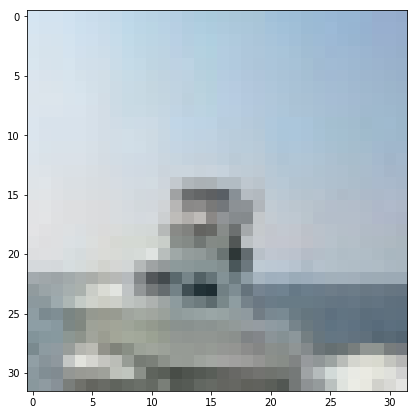

In [17]:
# check to see if "Image Array" data actually corresponds to Image parameters

plt.figure(figsize=(7,7))
print('This is a sample image of a', dfcifar10_train['Target Names'][100])
plt.imshow(dfcifar10_train['Image Array'][100])
plt.show()

__Note:__ We will not scale or transform the images at this time. The focus is on creating the four datasets: <br> 
dfcifar10_train, dfcifar10_test, dfcifar110_train, dfcifar110_test.

---
### 2.4-2.5 DataFrame Subset and Transfer
To create dfcifar110, we need to take a subset of _each_ class with the length of that found in each class in CIFAR100 (to maintain balancing). In other words, the subset will be 10% of each class in dfcifar10_train and dfcifar10_test.

There, we will add a new target variable - the "superclass" found in CIFAR-100 but not in CIFAR-10 - to the dfcifar10 train and test subsets.

Before we concatenate this data with dfcifar100, we need to have the features match exactly. Therefore, we need to create columns for Target Names and Image Arrays. Also as a technical but important point, we need to account for the class labels overlapping with that found in dfcifar. We will have to adjust the labels to make sure all classes are distinct.

In [18]:
# creating subset function
def CIFAR10_balancedsubset(df, targetvariablelist):
    
    dfbalancedsubset = pd.DataFrame(columns=list(dfcifar10_train.columns))
    
    for targetclass in targetvariablelist.unique():             
        subclass = df[targetvariablelist == targetclass].copy() # I personally use .copy() 
                                                                # all the time to avoid weird errors!!!!!
        #creating subclass via df.sample()    
        subclass = subclass.sample(frac=0.1, random_state=44)   # df.sample automatically shuffles the data for sampling!
        dfbalancedsubset = pd.concat([dfbalancedsubset, subclass])
                      
    return dfbalancedsubset                                                       

In [19]:
# applying function to dataframes
df10trainsubset = CIFAR10_balancedsubset(dfcifar10_train, dfcifar10_train['Target Names'])
df10testsubset = CIFAR10_balancedsubset(dfcifar10_test, dfcifar10_test['Target Names'])

In [20]:
# length check
df10trainsubset.shape # cut 5000 images per class down to 500 images per class to match dfcifar100

(5000, 4)

In [21]:
# 2.5 Superclass datacolumn addition:

def CIFAR10_superclass_mapping(target_label_list):
    
    final_label_list = []
    final_label_num_list = []
    
    # I don't think I can do this any other way but manually...
    
    labeldict = {0:'Vehicles 1', 1:'Vehicles 2', 2:'Reptiles', 3:'Medium-Sized Mammals', 
                 4:'Large Omnivores & Herbivores', 5:'Medium-Sized Mammals',
                6:'Reptiles', 7:'Large Omnivores & Herbivores', 8:'Vehicles 1', 9:'Vehicles 2'}
    
    # These Numeric Superclass values taken from original dataset
    labelnumdict = {'Vehicles1':18, 'Vehicles2':19, 'Reptiles':15, 
                    'Large Omnivores & Herbivores':11, 'Medium-Sized Mammals':12}
    
    for label in target_label_list:
        target_label = labeldict.get(label)
        
        final_label_list.append(target_label)
        final_label_num_list.append(labelnumdict.get(target_label))
        
        # outputs TWO Lists (to be convereted into Pandas Series and added to respective dataframes)
    return final_label_list, final_label_num_list


In [22]:
# applying function to subset df's - again, generating two data columns

df10trainsubset['Superclass Name'], df10trainsubset['Class Label'] = CIFAR10_superclass_mapping(df10trainsubset['Target Labels'])
df10testsubset['Superclass Name'], df10testsubset['Class Label'] = CIFAR10_superclass_mapping(df10testsubset['Target Labels'])

### 2.6 Creating the CIFAR-100 DataFrames

We will repeat the same DataFrame creation steps for CIFAR-100. Doing this ensures the shape and characteristics of the CIFAR-100 DataFrame match up perfectly to those in the CIFAR-10 datasets. The reason why this is so important is for the concatenation step between the two DataFrames via `pd.concat`; if the shapes and characteristics are not exact, an error will be thrown.

In [23]:
# checking the characteristics to import
print(batch100train.keys())
print(batch100test.keys())

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [24]:
# realized I went a little out of order creating superclass names when there are none!
# gotta set this up for CIFAR-100 input data ***before*** concatenation

'''
NOTE: 
I realized I could've created a second argument called ['a', 'b', 'c'] and compiled all the mapping
into one function, with "if 'b'", map label names, "if 'c'", map superclases, etc.
...but the code is already there. There's no performance lost by creating a new function, 
so I'm leaving it.
'''
#------------------------------------------------------------------

def CIFAR100_superclass_mapping(target_label_list):
    
    final_label_list = []
    
    # I don't think I can do this any other way but manually...again...
    # tried to carry over as much as I could though!
    
    labeldict = {18:'Vehicles 1', 19:'Vehicles 2', 15:'Reptiles', 12:'Medium-Sized Mammals', 
                 11:'Large Omnivores & Herbivores', 5:'Household Electronic Devices',
                6:'Household Furniture', 7:'Insects', 8:'Large Carnivores', 9:'Large Man-Made Outdoor Things',
                0:'Aquatic Mammals', 1:'Fish', 2:'Flowers', 3:'Food Containers', 4:'Fruits & Vegetables',
                10:'Large Natural Outdoor Scenes', 13:'Non-Insect Vertebrates', 14:'People', 16:'Small Mammals',
                17:'Trees'}
    
    for label in target_label_list:
        target_label = labeldict.get(label)
        
        final_label_list.append(target_label)
        
        # outputs TWO Lists (to be convereted into Pandas Series and added to respective dataframes)
    return final_label_list

In [25]:
# applying function

batch100traincoarselabellist = CIFAR100_superclass_mapping(batch100train.get(b'coarse_labels'))
batch100testcoarselabellist = CIFAR100_superclass_mapping(batch100test.get(b'coarse_labels'))

In [26]:
# creating DataFrames
'''
You will see I added '10' to the Target Label values. 
This was to ensure that there was no overlap in classification labels when adding 10 new classes labeled 0 to 9.
'''

dfcifar100_train = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch100train.get(b'data')]),
                                'Target Labels':pd.Series([i+10 for i in batch100train.get(b'fine_labels')]),
                               'Superclass Name': pd.Series(batch100traincoarselabellist)})

dfcifar100_test = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch100test.get(b'data')]),
                              'Target Labels':pd.Series([i+10 for i in batch100test.get(b'fine_labels')]),
                              'Superclass Name': pd.Series(batch100testcoarselabellist)})

In [94]:
# adding final datacolumn: transpositioned arrays

dfcifar100_train['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar100_train['1D Pixel Arrays']))
dfcifar100_test['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar100_test['1D Pixel Arrays']))

# again, keeping np array of this just in case
cifar100trainarray = np.array(array_to_pixel_dimensionality_transposition(dfcifar100_train['1D Pixel Arrays']))
cifar100testarray = np.array(array_to_pixel_dimensionality_transposition(dfcifar100_train['1D Pixel Arrays']))

In [28]:
list(dfcifar100_train.columns)

['1D Pixel Arrays', 'Target Labels', 'Superclass Name', 'Image Array']

In [29]:
meta100 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/meta')
print(meta100.keys())
meta100.get(b'fine_label_names')[:10]

dict_keys([b'fine_label_names', b'coarse_label_names'])


[b'apple',
 b'aquarium_fish',
 b'baby',
 b'bear',
 b'beaver',
 b'bed',
 b'bee',
 b'beetle',
 b'bicycle',
 b'bottle']

In [30]:
# mapping Target Names to Target Labels
# Note - however, that the superclass labels are in order, 
# so the functions are an accurate representation of that

targetnames = list(meta100.get(b'fine_label_names'))
targetnameappend = []

for i in dfcifar100_train['Target Labels']:
    i = i - 10 # gotta fix that again for this loop!
    labelname = targetnames[i]
    targetnameappend.append(labelname)

dfcifar100_train['Target Names'] = pd.Series(targetnameappend)

In [31]:
# doing same for cifar100test
targetnameappend = []

for i in dfcifar100_test['Target Labels']:
    i = i - 10 # gotta fix that again for this loop!
    labelname = targetnames[i]
    targetnameappend.append(labelname)

dfcifar100_test['Target Names'] = pd.Series(targetnameappend)

### 2.7 CIFAR-110 DataFrame Creation

In [32]:
# for the grand finale: CIFAR10 and CIFAR100 concatenation
# again, have to make sure the columns match up

print(dfcifar100_train.columns)
print(df10trainsubset.columns)

Index(['1D Pixel Arrays', 'Target Labels', 'Superclass Name', 'Image Array',
       'Target Names'],
      dtype='object')
Index(['1D Pixel Arrays', 'Target Labels', 'Target Names', 'Image Array',
       'Superclass Name', 'Class Label'],
      dtype='object')


In [33]:
print(batch100test.keys())
print(batch100test.get(b'batch_label')[5:20])

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
b'ng batch 1 of 1'


In [34]:
# one final data column to add: class label

dfcifar100_train['Class Label'] = pd.Series(batch100train.get(b'coarse_labels'))
dfcifar100_test['Class Label'] = pd.Series(batch100test.get(b'coarse_labels'))

In [105]:
# Let's concat!

df110train = pd.concat([dfcifar100_train, df10trainsubset], axis=0, sort=True, ignore_index=True).reset_index()
df110test = pd.concat([dfcifar100_test, df10testsubset], axis=0, sort=True, ignore_index=True).reset_index()

In [106]:
df110train.head(2)

,index,1D Pixel Arrays,Class Label,Image Array,Superclass Name,Target Labels,Target Names
0,0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 176, 237, 255, 255, 255, 255, 255, 252, 242, 229, ...",11.0,"[[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 25...",Large Omnivores & Herbivores,29,b'cattle'
1,1,"[255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, ...",15.0,"[[[255, 255, 255], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 25...",Reptiles,39,b'dinosaur'


In [46]:
# some points of data cleaning

# ***********NOTE*********** = Using this data cleaner turned all target names into the word "Cattle".
# Having the targets be "clean" is not that crucial for purposes of this project...although nice to have.

# I'm not sure how that index column got there...

# (commented out because I already dropped it)
#df101train.drop(columns='index', inplace=True) 
#df101test.drop(columns='index', inplace=True)

# Cleaning the Target Names - Making it Look Pretty
#import re

# def label_cleaner(labellist):
  #  for name in labellist:
   #     name = name.decode("utf-8") # originally in "bytes" datatype - could not do string cleaning that way
    #    name = re.sub('b\'', '', name)
     #   name = re.sub('\'', '', name)
      #  name = name.capitalize()
        
       # return name

# apply to data column
#df101train['Target Names'] = label_cleaner(df101train['Target Names'])
#df101test['Target Names'] = label_cleaner(df101test['Target Names'])

In [107]:
# another data cleaning point - reordering columns
# easiest way to do this is to overwrite the dataframe variable

df110train = df110train[['1D Pixel Arrays', 'Image Array', 'Target Names', 
                         'Target Labels', 'Superclass Name', 'Class Label']].copy()
df110test = df110test[['1D Pixel Arrays', 'Image Array', 'Target Names', 
                         'Target Labels', 'Superclass Name', 'Class Label']].copy()

# redoing stupid names

df110train.rename(columns={'Target Labels':'Target Num', 'Class Label': 'Superclass Num'}, inplace=True)
df110test.rename(columns={'Target Labels':'Target Num', 'Class Label': 'Superclass Num'}, inplace=True)

In [108]:
# As a final data cleaning thing, we are going to shuffle ALL datasets to minimize any 
# bias from the order of the datapoints. We can do this via the previously used df.sample

df110train = df110train.sample(frac=1, axis=0).reset_index(drop=True)
df110test = df110test.sample(frac=1, axis=0).reset_index(drop=True)

# CIFAR-10 datasets
# taking this as an opportunity to change my bad variables
df10_train = dfcifar10_train.sample(frac=1, axis=0).reset_index(drop=True)
df10_test = dfcifar10_test.sample(frac=1, axis=0).reset_index(drop=True)

### One Final Thing - Leaving the Data Split the Way It Is

CIFAR's train/test split is 5/6 to 1/6. Normally, that split is far too imbalanced; over 80% should be more than enough to train a good classifier.^ Normally, I would concatenate the two sets together, and re-split 75/25. Of course, I would use sklearn's hyperparameter `stratify` to ensure that the proportions of the various classes between the two sets are maintained.

However, if the purpose of this project is to find an _accurate_ and _efficient_ model, we should err on the side of caution. As such, I will leave the 5/6 // 1/6 proportion.

---
^ Another reason why I am leaving the split the way it is is because I do not for one second believe that my opinions on dataset splitting are better than the creators of this well-known and highly-curated dataset.

# 3. Data Visualization

Here, we will experiment with a few image manipulation techniques to see if we can create the best possible input image for data modeling. In other words, certain manipulation techniques may "augment" our data as a sort of pre-processing for the machine learning models.

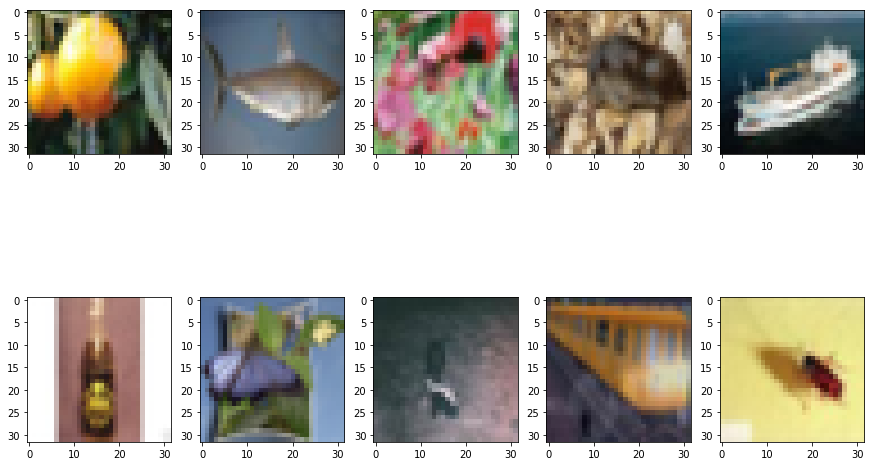

In [109]:
# sample images
plt.figure(figsize=(15,15))

sampleimages = df110train['Image Array'][600:610]

columns = 5
for i, image in enumerate(sampleimages):
    plt.subplot(len(sampleimages) / columns + 1, columns, i + 1)
    
    plt.imshow(image)
    

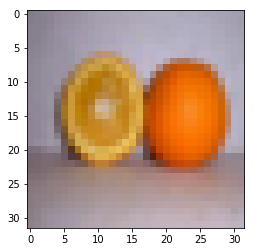

In [115]:
sampleimage = df110train['Image Array'][8001]
plt.imshow(sampleimage)
plt.show()

(32, 32)
uint8


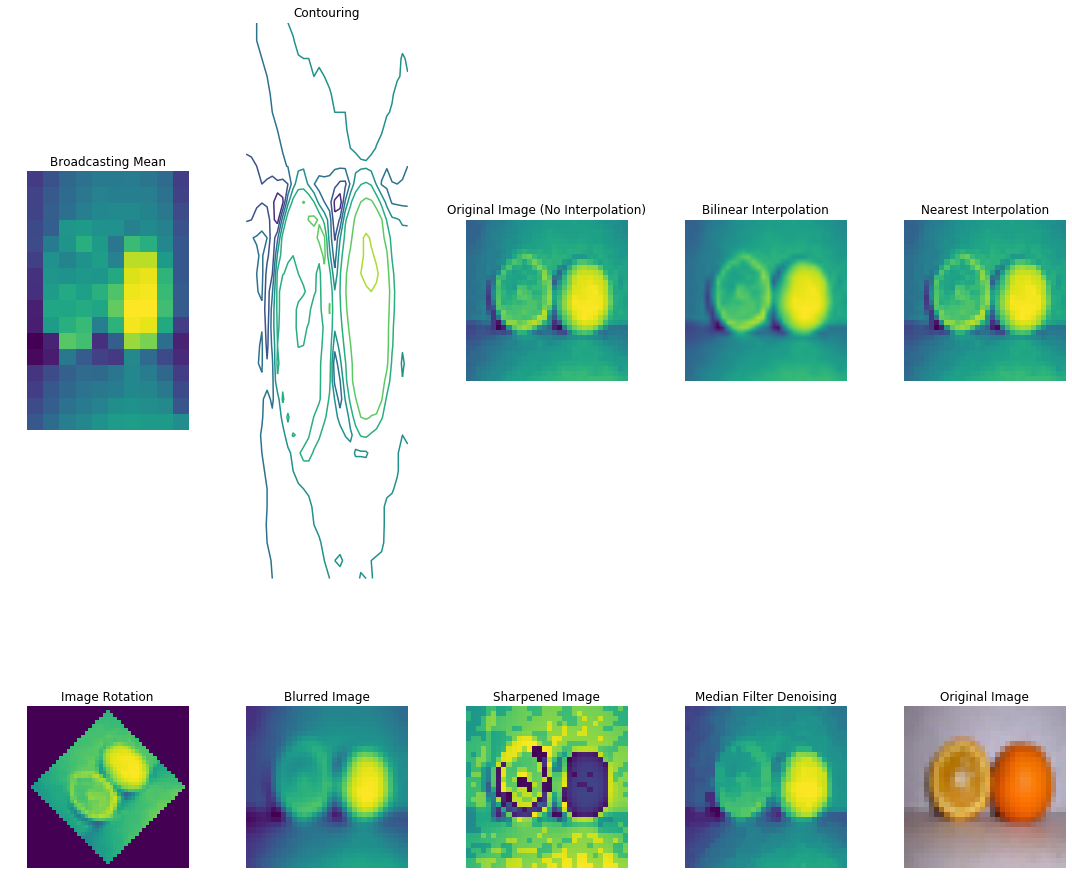

In [116]:
# sample manipulations of same image
from scipy import misc, ndimage
from scipy.misc import face
from skimage import filters

plt.figure(figsize=(15,15))

sampleimage = df110train['Image Array'][8001] # random example
sampleimage2d = sampleimage[:,:,0]


print(sampleimage2d.shape)
print(sampleimage2d.dtype)


#------------------------------------------------------------------

plt.subplot(2,5,1)
sx, sy = sampleimage2d.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//3 * (X//2) + Y//3
block_mean = ndimage.mean(sampleimage2d, labels=regions,
                              index=np.arange(1, regions.max() +1))
block_mean.shape = (sx//2, sy//3)
plt.imshow(block_mean)
plt.title('Broadcasting Mean')
plt.axis('off')

#------------------------------------------------------------------

contour = np.sin(sampleimage2d[0])*np.cos(sampleimage2d[1])

plt.subplot(2,5,2)
plt.contour(sampleimage2d)
plt.title('Contouring')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,3)
plt.imshow(sampleimage2d)
plt.title('Original Image (No Interpolation)')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,4)
plt.imshow(sampleimage2d, interpolation='bilinear')
plt.title('Bilinear Interpolation')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,5)
plt.imshow(sampleimage2d, interpolation='nearest')
plt.title('Nearest Interpolation')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,6)
plt.imshow(ndimage.rotate(sampleimage2d, 45))
plt.title('Image Rotation')
plt.axis('off')

#------------------------------------------------------------------

blurred_image = ndimage.gaussian_filter(sampleimage2d, sigma=1)
blurred_filtered_image = ndimage.gaussian_filter(blurred_image, sigma=0.5)
sharpened_image = blurred_image + 30 * (blurred_image - blurred_filtered_image)

plt.subplot(2,5,7)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,8)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,9)
noisy = sampleimage2d + 0.4*sampleimage2d.std()*np.random.random(sampleimage2d.shape)
med_denoised = ndimage.median_filter(noisy, 3)

plt.imshow(med_denoised)
plt.title('Median Filter Denoising')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,10)
sampleimage = df110train['Image Array'][8001]
plt.imshow(sampleimage)
plt.title('Original Image')
plt.axis('off')

#--------------------------------------------------------------
#plt.subplot(2,5,10)
#im = np.zeros(sampleimage2d.shape)
#im[64:-64, 64:-64] = 1
#sx = ndimage.sobel(sampleimage2d, axis=0, mode='constant')
#sy = ndimage.sobel(sampleimage2d, axis=1, mode='constant')
#sob = np.hypot(sx, sy)

#plt.imshow(sob)
#plt.title('Sobel filter')
#plt.axis('off')

#------------------------------------------------------------------

plt.tight_layout()
plt.show()

__Analysis:__

Judging by the raw images, it appears that no observed image manipulation technique enhances the original image. These image manipulation techniques are declared by the user (e.g., "rotate image 45 degrees"), but perhaps other preprocessing models may yield more helpful componenents...

---
# 4. Data Preparation for Unsupervised Modeling

Currently, images contain 3072 features (32 x 32 x RGB). Relatively speaking, this is a fairly manageable feature space to use as input data for our models. _However,_ when looking at the entirety of the data for unsupervised patterns, doing so with this many features is, for a lack of a better word, unfeasible.  Unsupervised analysis often goes hand in hand with __dimensionality reduction__. This is what is done here.

---

__Note:__ For reasons explained below, we will not use dimension-reduced data as inputs for the Supervised Convolutional Neural Network models.

---

## 4.1.-4.2. Which Dimensionality Reduction ("DR") Techniques to Use?

The answer to this question, like answers for all good questions, is: _it depends_. Below are just some factors to consider:
1. Is the data continuous & linear, or is it non-linear?
    - Probably the most important decider in the decision tree of choosing a DR model. Using a linear DR model such as PCA - which performs its calculations through a Gaussian distribution - on non-linear data (e.g., text data) will yield unreliable components.
        - __Good DR Models for Continuous Data:__ PCA, CCA, sometimes t-SNE
        - __Good DR Models for Non-Linear Data:__ LDA, Isomap, kernel_PCA, UMAP, sometimes t-SNE
    <br><br>
2. How sparse is the data? How big is the dataset?
    - There are some models that are specifically designed to handle sparse data, such as _Single Vector Decomposition (SVD)_ or _Latent Discriminant Analysis (LDA)_. For example, the latter model, LDA, focuses on the individual features themselves for each of the classes. This would prove unhelpful if (1) the combination of features provides strong explanatory power but not its individual parts, or (2) the feature space is gigantic. It is for reason (2) that SVD is used in large sparse text data feature spaces; LDA's analysis on individual features limits its suitability to smaller datasets.
        - __Good DR Models for Large datasets/feature spaces:__ SVD, Locality Sensitivity Hashing
        - __Good DR Models for Smaller datasets/feature spaces:__ LDA, CCA
    <br> <br>
3. How much explained variance are you willing to lose by the reduction?
    - This is arguably the biggest benefit to using PCA: the feature space can be reduced down to only a handful of components, and yet PCA often retains over 80% of the explained variance. Other models, such as SVD, are terrible at retaining variance.
    <br><br>
4. How computationally heavy is the dimensionality-reduction model?
    - Self-explanatory. Typically non-linear DR models take longer. This trade-off is always something to consider.
        - __Good DR Models for Needing Low Computational Overhead:__ PCA
        - __Bad DR Models for Needing Low Computational Overhead:__ Anything discriminant (LDA), anything requiring pair-wise calculations (CCA, Random Projections)...basically everything that's not PCA
        
---
### DR Technique to use Here

Given the above explanation, we will be using __PCA, t-SNE, and compared with LDA__. Image data does not expect a point of central tendency like how PCA does. However, again, PCA is widely used because it retains variance really well.  For t-SNE, which operates on a stochastic gradient descent algorithm, can look "across" the feature space for good components. With that said, our feature space size of 3072 is not nearly large enough to warrant the use of SVD or manifold learning models such as Isomap.

To measure the effectiveness of these models, we will measure the variance and time to converge on a sample classifier model - the feed-forward __MLP Classifier.__ Those classifier's results will determine which DR technique is best suited for our dataset moving forward. Moreover, we will compare these classifier's results between CIFAR101 (large, multiclass) and CIFAR10 datasets (small, 10-class).

---
### Three Final Notes Regarding Data Preparation

#### 4.2.1. Manual Feature Space Manipulation

One easy way to cut down the feature space from 3072 to 1024 (32 x 32) is to put it in greyscale. Because the feature space is already relatively small, and because the dataset is so big, reducing the feature space in this manner is unnecessary - maybe even detrimental to testing accuracy.

#### 4.2.2. Use of MLP Classifier

Feed forward networks are not meant to be used for image data. The linear nature of this neural network lends itself to tabular data as opposed to non-linear data (images, audio/video data, etc.). However, we are merely using it here as a quick check for which DR technique is best. MLP Classifier quickly can provide a baseline prediction for neural network models.

#### 4.2.3. Final Preprocessing

At this point in the project, we would be transforming our data in preparation to push it into models. However, CIFAR was generous enough to do most of the heavy-lifting for us: all image shapes are the same, all image resolutions are the same, the target variables are already numerically encoded, and the dataset is perfectly balanced. The only preprocessing left to do is scaling/normalization. As you will see, this is done by simply dividing all image array values by 255, as the range of each feature is (0,255).

In [57]:
# relevant imports
import time
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [194]:
# SETTING UP THE DATA


# declaring x's and y's
# will use two separate classification columns

# have to flatten in order to get proper input
X10train = df10_train['Image Array'].ravel()
X10test = df10_test['Image Array'].ravel()

X110train = df110train['Image Array'].ravel()
X110test = df110test['Image Array'].ravel()

#---------------------------------------------------

# sklearn demands 2 dimensional data (X[:,0], y[:,0]), so gotta appease the sklearn gods

X10trainflat = X10train.reshape(len(X10train),-1)
X10testflat = X10test.reshape(len(X10test),-1)

X110trainflat = X110train.reshape(len(X101train),-1) # array element with sequence error
X110testflat = X110test.reshape(len(X101test),-1)

#------------------------------------------------------

# 3rd variation of unstacking 

X10train_unstack = np.stack(df10_train['Image Array'].to_numpy()) # 4d error
X10test_unstack = np.stack(df10_test['Image Array'].to_numpy())

X110train_unstack = np.stack(df110train['Image Array'].to_numpy())
X110test_unstack = np.stack(df110test['Image Array'].to_numpy())

#---------------------------------------------------

# 4th variation of unstacking
X10train_unstack1 = np.array(df10_train['Image Array'].to_numpy().tolist()) # gives us what we want, but it's in 4D:
X10test_unstack1 = np.array(df10_test['Image Array'].to_numpy().tolist())   # 50000,32,32,3 - no bueno for sklearn models

X110train_unstack1 = np.array(df110train['Image Array'].to_numpy().tolist())
X110test_unstack1 = np.array(df110test['Image Array'].to_numpy().tolist())

#----------------------------------------------------------

#5th variation of unstacking
X10trainflatagain = np.reshape(X10train_unstack1, (X10train_unstack1.shape[0],-1)) # converts the 4th variation to 2D:
X10testflatagain = np.reshape(X10test_unstack1, (X10test_unstack1.shape[0],-1))    # shape 50000 x 3072 - 
                                                                                   #I can work with that
X110trainflatagain = np.reshape(X110train_unstack1, (X110train_unstack1.shape[0],-1))
X110testflatagain = np.reshape(X110test_unstack1, (X110test_unstack1.shape[0],-1))

#---------------------------------------------------

#6th variation - 5th variation worked but just covering all of my bases
X10trainflatagainagain = np.reshape(X10train_unstack, (X10train_unstack.shape[0],-1))# produces same result as 5th variation
X10testflatagainagain = np.reshape(X10test_unstack, (X10test_unstack.shape[0],-1))   
                                                                                   
X110trainflatagainagain = np.reshape(X110train_unstack, (X110train_unstack.shape[0],-1))
X110testflatagainagain = np.reshape(X110test_unstack, (X110test_unstack.shape[0],-1))

#-----------------------------------------------------

# Likewise, you must create one-hot encodings for your target variables (it is neural network law)

y10train = df10_train['Target Labels'] 
y10test = df10_test['Target Labels']

y110train = df110train[['Target Num', 'Superclass Num']]
y110test = df110test[['Target Num', 'Superclass Num']]

# doing categorical one hot now:
import keras
y10train_classlabel = keras.utils.to_categorical(y10train, 10) # encode a total of 10 classes
y10test_classlabel = keras.utils.to_categorical(y10test, 10)

ytrain110_classlabel = keras.utils.to_categorical(y110train['Target Num'], 110) # 110 classes, excluding superclass column!
ytest110_classlabel = keras.utils.to_categorical(y110test['Target Num'], 110)   

# NOTE: It is almost guaranteed we won't use all of these variables
# This is illustrative of the importance of the proper shape for ANN inputs

In [155]:
# out of the above, using 5th variation
x10train = X10trainflatagain.astype(float)
x10test = X10testflatagain.astype(float)
x110train = X110trainflatagain.astype(float)
x110test = X110testflatagain.astype(float)

# normalizing by dividing values by 255


# ---commented out because I don't want to run that more than once---
#x10train /= 255
#x10test /= 255
#x110train /= 255
#x110test /= 255

In [197]:
#import classifier for basic modeling example


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#instantiation
# only difference is that I dropped max_iter and n_iter_no_change - all else same

mlp = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
                    hidden_layer_sizes=(20,20,20), max_iter=150, random_state=444,
                    solver='adam', n_iter_no_change=6, verbose=False)

mlp.fit(x10train, y10train)
ypred = mlp.predict(x10test)
yproba = mlp.predict_proba(x10test)
print('MLP Accuracy Score on testing set for CIFAR10 is: {}%'.format(round(accuracy_score(ypred, 
                                                                                          y10test)*100),2))

mlp.fit(x110train, ytrain110_classlabel)
ypred1 = mlp.predict(x110test)
yproba1 = mlp.predict_proba(x110test)
print('MLP Accuracy Score on testing set for CIFAR110 is: {}%'.format(round(accuracy_score(ypred1, 
                                                                                           ytest110_classlabel)*100)))

MLP Accuracy Score on testing set for CIFAR10 is: 40.0%


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Accuracy Score on testing set for CIFAR110 is: 1.0%


In [200]:
# comparing above accuracy scores with PCA-ed datasets

'''
We want to find the best tradeoff between lost variance and ease of computation, 
and so we want to find the lowest number of dimensions that retains variance up to a designated amount
'''
# idea taken from Kaggle user Hamish Dickson for PCA analysis****************

def best_PCA_fit(fittingdata, minimumretainedvariance=0.857): # recommendation of amount of retained variance
                                                              # to be ~6 out of 7 items  
    # model instantiation
    pcacheck = PCA()
    pcacheck.fit(fittingdata)
    cumulativesum = np.cumsum(pcacheck.explained_variance_ratio_)
    
    num_dimensions = np.argmax(cumulativesum >= minimumretainedvariance) + 1 # gotta have at least 1 dimension!
    
    print("The best number of dimensions to use for PCA on the fitting data is {}.".format(str(num_dimensions)))

In [199]:
# applying function to our dataset
best_PCA_fit(x10train)
best_PCA_fit(x110train)

The best number of dimensions to use for PCA on [[0.44705882 0.45490196 0.43529412 ... 0.61176471 0.64705882 0.61960784]
 [0.23137255 0.16470588 0.12156863 ... 0.61568627 0.43921569 0.27843137]
 [0.01960784 0.03137255 0.08627451 ... 0.83137255 0.86666667 0.53333333]
 ...
 [0.91764706 0.74509804 0.75686275 ... 0.55294118 0.53333333 0.54901961]
 [0.37647059 0.40392157 0.4627451  ... 0.74509804 0.78823529 0.98431373]
 [0.07843137 0.10196078 0.14117647 ... 0.18039216 0.27843137 0.36078431]] data is 59.
The best number of dimensions to use for PCA on [[0.98823529 1.         1.         ... 0.98823529 0.99215686 0.98431373]
 [0.27843137 0.30196078 0.17254902 ... 0.32941176 0.30196078 0.26666667]
 [0.2        0.29411765 0.16862745 ... 0.48235294 0.58431373 0.21568627]
 ...
 [0.70980392 0.62745098 0.55294118 ... 0.69019608 0.61960784 0.56862745]
 [0.44705882 0.42352941 0.36862745 ... 0.45490196 0.43137255 0.36078431]
 [0.56078431 0.72941176 0.31372549 ... 0.34117647 0.50196078 0.05882353]] data

In [201]:
# instantiating model
from sklearn.decomposition import PCA

# only doing CIFAR-10 for this portion - will go back to analysis for both in following MLP
pca = PCA(n_components=59)
X_reduced = pca.fit_transform(x10train)
Xtest_reduced = pca.fit_transform(x10test)

X_recovered = pca.inverse_transform(X_reduced) # using this to "undo" the PCA-ing for graphing purposes

In [212]:
# doing same for CIFAR-110
pca = PCA(n_components=51)
X110_reduced = pca.fit_transform(x110train) # I know optimal is 51, not 59...
X110test_reduced = pca.fit_transform(x110test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


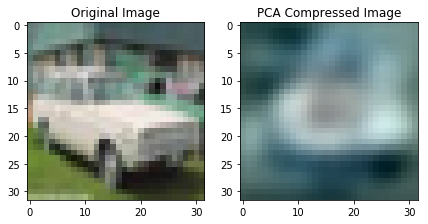

In [229]:
# graphing difference between original and PCA

plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(x10train[5925].reshape((32,32,3))) # random image chosen

plt.subplot(1,2,2)
plt.title("PCA Compressed Image")
plt.imshow(X_recovered[5925].reshape((32,32,3)))

plt.show(block=True)

In [215]:
# final analysis: comparing PCA components against normal values above

time_start = time.time()

mlp.fit(X_reduced, y10train)
ypred = mlp.predict(Xtest_reduced)
yproba = mlp.predict_proba(Xtest_reduced)
print('MLP Accuracy Score on testing set for CIFAR10 is: {}%'.format(round(accuracy_score(ypred, 
                                                                                          y10test)*100),2))

mlp.fit(X110_reduced, ytrain110_classlabel)
ypred1 = mlp.predict(X110test_reduced)
yproba1 = mlp.predict_proba(X110test_reduced)
print('MLP Accuracy Score on testing set for CIFAR110 is: {}%'.format(round(accuracy_score(ypred1, 
                                                                                           ytest110_classlabel)*100)))

print('Total time to run both models was: {} seconds.'.format(time.time()-time_start))

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Accuracy Score on testing set for CIFAR10 is: 21.0%
MLP Accuracy Score on testing set for CIFAR110 is: 1.0%
Total time to run both models was: 125.99755930900574 seconds.


C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


__Analysis:__ 
- MLP Testing accuracies without PCA: 40.0% (CIFAR-10); 1.0% (CIFAR-110)
- MLP Testing accuracies with PCA...: 21.0% (CIFAR-10); 1.0% (CIFAR-110)

Surprisingly, PCA's effect on the feature space  was significantly worse when working with CIFAR-10. This is probably because the feature space was overly simplified. CIFAR-110 on the other hand could work _much_ faster with reduced dimensionality and still achieve the same \[dismal\] accuracy.^ Having a stronger need for dimensionality reduction for larger feature spaces as opposed to smaller ones makes intuitive sense.

Likely, the linear nature of PCA may not be suitable for non-linear image data. As stated above, PCA requires a normal distribution, or at least a point of central tendency. There is no such point with image data. Therefore, while PCA significantly sped up the runtime from over 5 minutes to about 2 minutes, accuracy will suffer because of the nature of PCA.

All in all, we were able to reduce 3072 features down to __59.__ Unfortunately, doing so reduced the resolution past the point that reasonable human eyes could detect what is in the image; however, the image was significantly blurry to begin with. Image data is fickle, and so going down the path of dimensionality reduction is one of caution.

As far as the comparison between the MLP model on CIFAR-10 vs. -110, the accuracy scores are indeed staggering. Comparing the above with the respective __null accuracies__^^ of 10% and 0.9%, MLP was virtually unable to fare better than randomly guessing 1 out of 110 categories. 

As a final note: MLP took a very long time to run. This is even with `max_iter=150`! Having achieved the unimpressive scores, this is an indicator that MLP is simply not good for handling image data. Again, MLP is a much more sequential algorithm, whereas analyzing the pixel space on an image is not sequential. For this reason, we should not be surprised that the MLP's scores were as bad they were.

---
__Note1:^__ According to the warning, the number of iterations was not enough to have this model converge, hence a major reason for the low accuracy. Because we are using this model as a baseline test and not a formal machine learning model, this is okay.

__Note2:^^__ The "null accuracy" is the accuracy if the model simply guessed the most prominent class for everything. For example, if a binary classifier had 80% 0's and 20% 1's, the null accuracy would be "80%," making an "85%" accuracy score on such a model not all that impressive.

---
# 5. Unsupervised Modeling

We will see through Spectral Clustering if there is a particular combination of arrays that are similar, so that we keep that information in mind moving forward.

---
## 5.1. Spectral Clustering

This kind of clustering matches up datapoints pair-wise for similiarities between the two. The good thing about spectral clustering is that this pair-wise analysis is good for non-linear data, such as image data. The bad thing is that, as with any pair-wise computation, it is ___slowwww.___

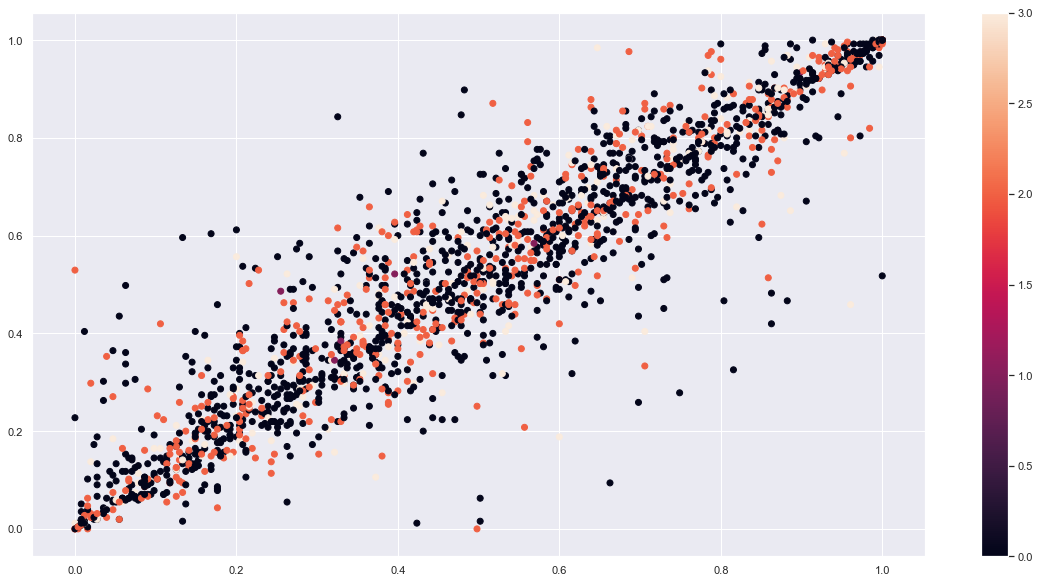

Comparing the assigned categories to the ones in the data:
col_0            0  1   2   3
Target Labels                
0              153  1  54  18
1              100  1  43  29
2              117  0  49  24
3              146  1  52  25
4              119  1  42  23
5              131  0  55  16
6              107  0  47  22
7              135  1  47  24
8              132  1  51  32
9              116  2  62  21

Total time to run this model was: 89.02483248710632 seconds.


In [257]:
from sklearn.cluster import SpectralClustering

# Going to be using CIFAR-10 for this
# and only 10000 of the training data
time_start = time.time()

n_clusters=4

# setting up x
xtraincluster = x10train.reshape(-1,1) 

# Declare and fit the model. - 
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(xtraincluster[10000:12000]) # only doing a sample due to computational constraints

#Predicted clusters.
predict=sc.fit_predict(xtraincluster[10000:12000])

#Graph results

plt.figure(figsize=(20,10))
sns.set(style='darkgrid', palette='husl') # for whatever reason, clustering models LOVE to use inopportune colors...

plt.scatter(x10train[10000:12000, 0], x10train[10000:12000, 1], c=predict)
plt.colorbar()
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y10train[10000:12000], predict))# function from earlier

print('\nTotal time to run this model was: {} seconds.'.format(time.time()-time_start))

__Analysis:__ Unfortunately, there are no distinct blobs from which we can discern certain classes from having distinct characteristics. However, there is value in confirming that the images are similar. It indicates that __all images have a balance of darkspots and bright spots in the image.__ Additionally, even though we set the number of clusters to 4, nearly the entire observed set - datapoints of which are shuffled - only fall into three main components. This too is valuable information.

With that said, perhaps returning to a dimensionality reduction technique will we find more salient components.

---
## 5.2 t-Stochastic Neighbor Embedding (t-SNE)

This is a stochastic gradient descent model that creates a low-dimensional mapping of non-linear structured data. This kind of low-dimensional mapping results in the more convenient spreading out, as opposed to PCA and others who suffer from the curse of dimensionality and output a crowded blob.  

While t-SNE provides a unique dimensionality reduction technique, it As such, it performs its own dimensionality reduction. Downside is that it gets computationally heavy very quickly, so it is advised to splice your input data, like how we did with spectral clustering.

In [260]:
print(x10train)

[[0.44705882 0.45490196 0.43529412 ... 0.61176471 0.64705882 0.61960784]
 [0.23137255 0.16470588 0.12156863 ... 0.61568627 0.43921569 0.27843137]
 [0.01960784 0.03137255 0.08627451 ... 0.83137255 0.86666667 0.53333333]
 ...
 [0.91764706 0.74509804 0.75686275 ... 0.55294118 0.53333333 0.54901961]
 [0.37647059 0.40392157 0.4627451  ... 0.74509804 0.78823529 0.98431373]
 [0.07843137 0.10196078 0.14117647 ... 0.18039216 0.27843137 0.36078431]]


In [261]:
# t-SNE MODELING EXAMPLE
# going to compare this model to PCA

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

time_start = time.time()

# model instantiation
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

# n_components       (Default:2) --> number of dimensions to reduce to
# perplexity         (Default:30) --> the t-SNE analog to no. of clusters 
           # Normal values range 5 to 50 (but can be as low as 2)

# get features/labels
tsne_results = tsne.fit_transform(x10train[:10000]) # specifically spliced down to ONLY 10000 samples

'''
NOTE: For a sample set of 784 dimensions (28x28 images), it took ~157 seconds to run to completion.
For 20000 datapoints with 784 dimensions, t-SNE takes ~1172 seconds (~19.5 minutes).

Hyperparameter 'method'=
='barnes-hut' (default parameter) runs in O(NlogN) time
='exact' is more exact but runs in O(N^2) time
'''

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
# NOTE: I thought my processor was gonna melt. The t-sne calculation is using 2gb's of RAM just to do this.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.710s...
[t-SNE] Computed neighbors for 10000 samples in 588.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.844033
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.368439
[t-SNE] KL divergence after 300 iterations: 3.386590
t-SNE done! Time elapse

In [269]:
# doing same for cifar110

time_start = time.time()
# so 10000 rows took forever, and I felt like my computer wasn't going to explode
# as you can see by me increasing n_iter, I clearly have not learned my lesson...


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500)

tsne110_results = tsne.fit_transform(x110train[:10000]) # above was way too calculation-heavy
print('t-SNE for CIFAR-110 done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.869s...
[t-SNE] Computed neighbors for 10000 samples in 590.897s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.964155
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.297035
[t-SNE] KL divergence after 2500 iterations: 2.869453
t-SNE for CIFAR-110 do

PCA conversion for CIFAR-10 done! Time elapsed: 7.329803705215454 seconds


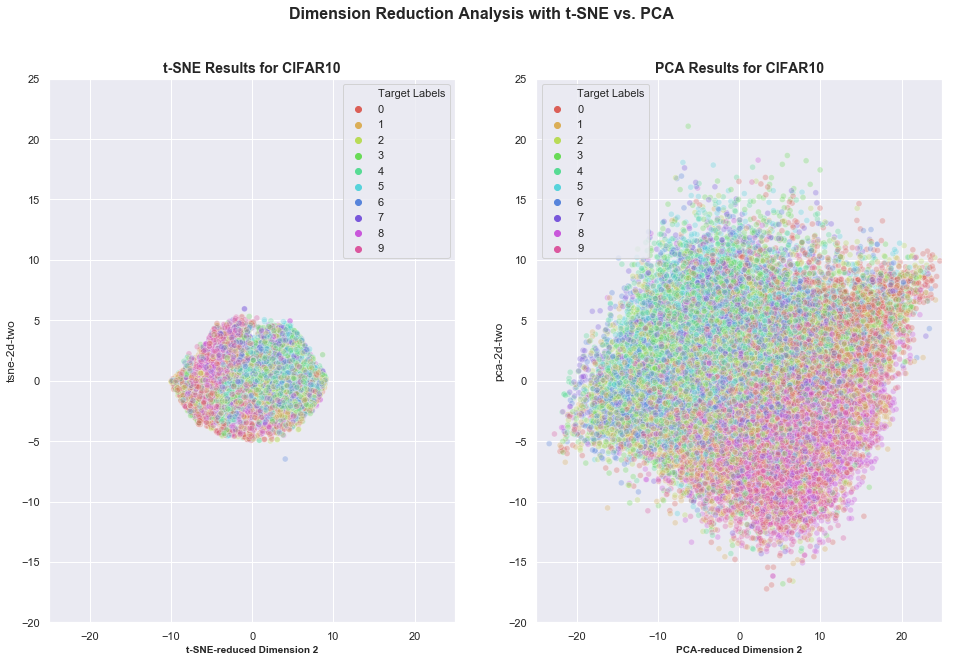

In [271]:
# plotting (CIFAR-10 only)

# for 2D graphs, choose two tsne resulting features to graph:

# need new df because seaborn is finnecky
dftsne = pd.DataFrame()

dftsne['tsne-2d-one'] = tsne_results[:,0] # again, using cifar-10 data
dftsne['tsne-2d-two'] = tsne_results[:,1]
dftsne['Target Labels'] = df10_train['Target Labels']

plt.figure(figsize=(16,10))
ax1=plt.subplot(1,2,1)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Target Labels",
    palette=sns.color_palette("hls", 10),
    data=dftsne,
    legend="full",
    alpha=0.3,
    ax=ax1
)
plt.xlim(-25,25) # need to explicitly declare this for uniformity between the two graphs
plt.ylim(-20,25)
plt.title('t-SNE Results for CIFAR10', weight='bold').set_fontsize('14')
plt.xlabel('t-SNE-reduced Dimension 1', weight='bold').set_fontsize('10')
plt.xlabel('t-SNE-reduced Dimension 2', weight='bold').set_fontsize('10')

#----------------------------------------------
#----------------------------------------------
# comparing above graphing result with PCA results

time_start = time.time()

# need to set PCAcomponents to 2 if doing 2D graph...

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x10train)

print('PCA conversion for CIFAR-10 done! Time elapsed: {} seconds'.format(time.time()-time_start))

# I need to create a df...because seaborn is STILL finnecky
dfpca = pd.DataFrame()

dfpca['pca-2d-one'] = X_reduced[:,0]
dfpca['pca-2d-two'] = X_reduced[:,1]
dfpca['Target Labels'] = df10_train['Target Labels']

# actually doing the graphing

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="Target Labels",
    palette=sns.color_palette("hls", 10),
    data=dfpca,
    legend="full", # or set to: True
    alpha=0.3,
    ax=ax2
)
plt.xlim(-25,25)
plt.ylim(-20,25)

plt.title('PCA Results for CIFAR10', weight='bold').set_fontsize('14')
plt.xlabel('PCA-reduced Dimension 1', weight='bold').set_fontsize('10')
plt.xlabel('PCA-reduced Dimension 2', weight='bold').set_fontsize('10')

#-------------------------------------------------------
plt.suptitle('Dimension Reduction Analysis with t-SNE vs. PCA', weight='bold').set_fontsize('16')
plt.show()

__Analysis:__ According to the timestamps, PCA converged nearly __100 times faster__ than t-SNE. What is more disturbing, however, is the tight cluster for t-SNE. When the axes were standardized between the two graphs, we see that t-SNE resulted in an extremely tight cluster - something which is highly unusual for t-SNE (in fact, the whole point of using t-SNE despite its high computational demand is that it results in fairly spread out clusters). In the future, it may be beneficial to initialize the t-SNE model with PCA information (i.e., PCA it first, _then_ t-SNE it) as to avoid the high computational demand.

The good news is that the graphs indicate that is _some_ distinction between classes. Specifically, we see that the CIFAR-10 vehicles classes (0: airplane, 1: automobile, 8: ship, 9: truck) are clustered in some area separate from the remaining 6 animals classes (2: bird, 3:cat, 4:deer, 5:dog, 6:frog, 7:horse). While this seems intuitive to an extent, confirming information is never a bad thing.

---
## 5.3. LDA

Because t-SNE has failed to provide disparate clusters, we will be doing one final dimensionality reduction technique: __Linear Discriminant Analysis (LDA).__ LDA seeks to find the axis with the largest class separation (via the "maximal distance between the means of the classes") and projects the results onto that hyperplane. LDA differs from PCA and t-SNE in that it requires a target variable, whereas the other two can be strictly unsupervised. Thus, in addition to seeing how this dataset fares with LDA, the LDA also serves as a good transition into the supervised learning portion of this project.

LDA with shrinkage done! Time elapsed: 136.30914044380188 seconds
LDA without shrinkage done! Time elapsed: 164.71282029151917 seconds
LDA on CIFAR-110 with shrinkage done! Time elapsed: 216.6679708957672 seconds


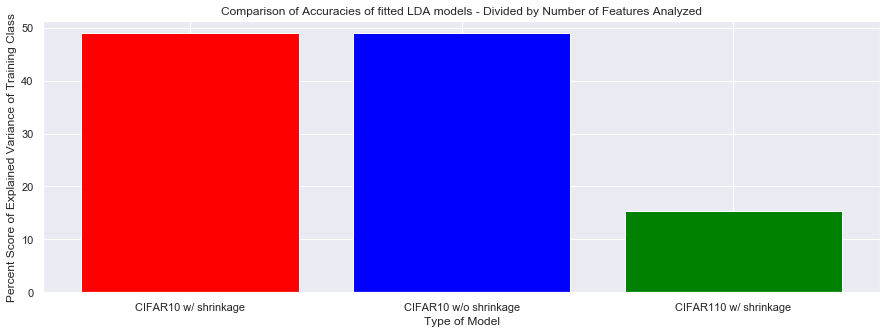

In [296]:
# doing LDA analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Double plot
# Plot 1 - basic scatterplot - CIFAR-10

# LDA needs a y - it can only do supervised learning
# lsqr solver = "Least Squares" solution - according to sklearn documentation:
                                         # good for classification and also offers shrinkage, unlike default SVD

# shrinkage = regularization parameter that shrinks the covariance matrix for higher accuracy

# LDA1 - comparing times for shrink vs. no shrink
time_start = time.time()

lda1shrink = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(x10train, df10_train['Target Labels'])
score1 = lda1shrink.score(x10train, df10_train['Target Labels'])*100

print('LDA with shrinkage done! Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()

lda1noshrink = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(x10train, df10_train['Target Labels'])
score2 = lda1noshrink.score(x10train, df10_train['Target Labels'])*100

print('LDA without shrinkage done! Time elapsed: {} seconds'.format(time.time()-time_start))

#LDA2 - cifar110 with shrinkage

time_start = time.time()

lda2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(x110train, df110train['Target Num'].tolist())
lda2pred = lda2.predict(x110test)
score3 = accuracy_score(df110test['Target Num'].tolist(), lda2pred.tolist())*100 # lda.score can't handle df110

print('LDA on CIFAR-110 with shrinkage done! Time elapsed: {} seconds'.format(time.time()-time_start))

#----------------------------------------
plt.figure(figsize=(15,5))

plt.bar(x=['CIFAR10 w/ shrinkage', 'CIFAR10 w/o shrinkage', 'CIFAR110 w/ shrinkage'],
       height=[score1, score2, score3], color=['red', 'blue', 'green'])
plt.title('Comparison of Accuracies of fitted LDA models - Divided by Number of Features Analyzed')
plt.xlabel('Type of Model')
plt.ylabel('Percent Score of Explained Variance of Training Class')

plt.show()

__Analysis:__ We see here that applying LDA shrinkage regularization, the model did not lose any explained variance. Separately, accounting for the null accuracy, the CIFAR110 model actually fared _better_ than the CIFAR10 models.

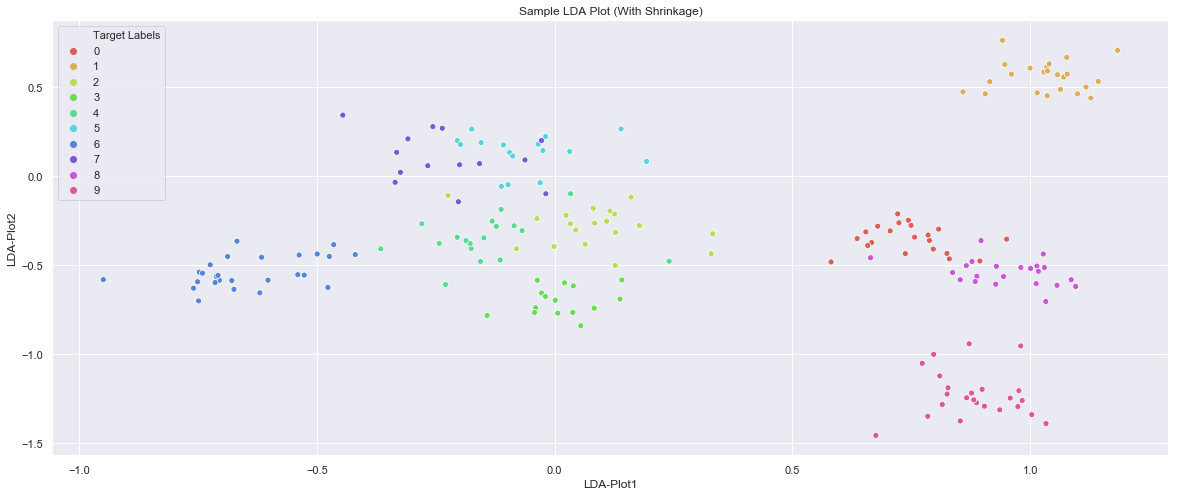

In [320]:
# plotting LDA

# sample plot model instantiation and plotting
ldaplot = LinearDiscriminantAnalysis(n_components=2,   # setting components to 2 for 2D visualization
                                     solver='eigen',   # apparently can't transform with 'lsqr' 
                                     shrinkage='auto')       # (which makes sense if you think about it) 

ldaplotresults = ldaplot.fit_transform(x10train[:200], df10_train['Target Labels'][:200])

ldaplot1 = LinearDiscriminantAnalysis(n_components=2,
                                     solver='eigen', 
                                     shrinkage=None) 

ldaplotresults1 = ldaplot.fit_transform(x10train[:200], df10_train['Target Labels'][:200])

#--------------------------------------------
#plotting declaration

#setting up sns dataframe
pltldadf = pd.DataFrame()
pltldadf['LDA-Plot1'] = ldaplotresults[:,0]
pltldadf['LDA-Plot2'] = ldaplotresults[:,1]
pltldadf['Target Labels'] = df10_train['Target Labels']


plt.figure(figsize=(20,8))



sns.scatterplot(x='LDA-Plot1', y='LDA-Plot2', hue='Target Labels', data=pltldadf,
           palette=sns.color_palette('hls',10), legend='full')

plt.title('Sample LDA Plot (With Shrinkage)')

plt.show()

__Analysis:__ While LDA was undeniably effective in creating discrete clusters, it is in no way meant for largescale datasets. As you see, I cut down the analysis to 200 rows because the process would simply note complete for even 20,000 rows. Still, it gives you a clear shot of what kind of data you are working with. The following clusters are found:
- 2,3,4(Bird,Cat,Deer)
- 5,7(Dog,Horse)
- 6 alone(Frog)
- 0,8(Airplane, Ship)
- 9 alone(truck)
- 1 alone(automobile)

### Final Section Analysis

The purpose of this section is to use a particular dimension reduction technique for our models heading into unsupervised learning territory because (1) sklearn models can't handle multi-dimensional inputs (like our 4D arrays inside a pandas series) and (2) because it __SIGNIFICANTLY__ cuts down on our processing time. It is, and has always been, a tradeoff between efficiency and accuracy. For example, the LDA plot was the only one that provided clear cut clusters to observe. However, in order for it to process, I had to sample less than 10% of the training dataset.

While dimensionality reduction was used here as an unsupervised learning technique, it will __not__ be used in the supervised learning models. \[According to my mentor :)\] it is critical that the image data not be changed to something that it's not. Of course, reducing dimensions would do exactly that.  For this reason, we will be focusing on a neural network model that can accommodate the data's original shapes...

---
# 6. Supervised Learning

Of course, the goal of this project is to measure model accuracy. The purpose of unsupervised learning is information gain (i.e., "what clusters with what", and hypothesize why). The heart of this project is the supervised modeling. Only one model will be used here, but its effect on image data is powerful: __Convolutional Neural Networks (CNN).__
 
CNN allows for retaining the spatial character of a model even though it flattens and expands the pixels. Performing repeated convolutions, however, is computation-heavy, but there is no substitute for the right tool for the right job.

## Some Models --Not-- Used Here:

- __Logistic Regression:__ Not suitable for multi-class problems, let alone ones with 110 classes involved. Nonetheless, it is often used to make quick baseline predictions, like in the same manner as how we used sklearn's MLP classifier (which is also not suitable for this kind of problem).
<br><br>
- __K-Nearest Neighbors:__ It is unclear how KNN could account for the spatial order of pixel information when it is determining distances. Without accounting for order, its results would be inaccurate.
<br><br>
- __Feed Forward Neural Networks:__ Similar to the reasoning for not modeling with KNN, Feed forward networks such as the MLP Classifier work in a layer-to-layer sequential order. This linear nature will not produce the best results for non-linear data (including image, audio, and video data).
<br><br>
- __Recurrent Neural Networks:__ Similar to the Feed Forward Neural Network reasoning, RNNs work best with "sequence prediction" problems, such as text/speech data and generative modeling. Again, image data is not suitable for linear modeling.

In [450]:
# STEP 1 - SETTING UP THE DATA
'''
In order for CNN to work properly, it must receive as input the original resolution
as to ensure that the original data is maintained. In other words, we must use 32x32x3

For y, we will use keras' "to_categorical", which changes a class number into a binary array
(which is more suitable for this)
'''
print(x10trainarray.shape)
print(x110trainarray.shape)
print(y10test.shape)
print(y10train.shape)
print(ytest10_classlabel.shape)

(50000, 32, 32, 3)
(55000, 32, 32, 3)
(10000,)
(50000,)
(10000, 10)


In [454]:
# these are the correct inputs! Setting them to easy-to-understand variables

xtrain10o = x10trainarray
xtest10o = x10testarray
ytrain10o = ytrain10_classlabel # y class labels are categorically encoded per ANN's preference
ytest10o = ytest10_classlabel

xtrain110o = x110trainarray
xtest110o = x110testarray
ytrain110o = ytrain110_classlabel 
ytest110o = ytest110_classlabel

In [457]:
# datasets are very very large - will use a PORTION of the data for this analysis

xtrain10 = xtrain10o[8000:14000]
ytrain10 = ytrain10o[8000:14000]
xtest10 = xtest10o[600:1000] #maintaing ratio of 6:1
ytest10 = ytest10o[600:1000]

xtrain110 = xtrain110o[50000:52400]
ytrain110 = ytrain110o[50000:52400]
xtest110 = xtest110o[400:800]
ytest110 = ytest110o[400:800]

---
## 6.2. Artificial Neural Network Modeling

### A. Simple Convolutional Neural Network

In [460]:
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

In [516]:
from keras.layers import Conv3D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import MaxPooling3D

In [565]:
# Building the Model
def firstcnn(num_classes):
    model = Sequential()
    # First convolutional layer, note the specification of shape
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(32,32,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    print(model.summary())
    return model


In [578]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)              0         
__________

In [576]:
time_start= time.time()
history = model.fit(xtrain10, ytrain10,
                            nb_epoch=5,
                            verbose=1,
                            validation_data=(xtest10, ytest10))
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-10 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 6000 samples, validate on 400 samples
Epoch 1/5
6000/6000 [==============================] - 32s 5ms/step - loss: 14.4875 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
6000/6000 [==============================] - 33s 6ms/step - loss: 14.4875 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
6000/6000 [==============================] - 33s 5ms/step - loss: 14.4875 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
6000/6000 [==============================] - 32s 5ms/step - loss: 14.4875 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
6000/6000 [==============================] - 32s 5ms/step - loss: 14.4875 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Accuracy Score for this CNN for CIFAR-10 dataset is:  0.1
This model took 163.19233417510986 seconds


In [579]:
# redoing instantiation of model again for cifar 110
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(110, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 2048)              0         
__________

In [580]:
# cifar110 example

time_start= time.time()
history = model.fit(xtrain110, ytrain110,
                            nb_epoch=5,
                            verbose=1,
                            validation_data=(xtest110, ytest110))
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-110 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 2400 samples, validate on 400 samples
Epoch 1/5
2400/2400 [==============================] - 14s 6ms/step - loss: 15.9786 - acc: 0.0083 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/5
2400/2400 [==============================] - 13s 5ms/step - loss: 15.9838 - acc: 0.0083 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/5
2400/2400 [==============================] - 13s 6ms/step - loss: 15.9838 - acc: 0.0083 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/5
2400/2400 [==============================] - 13s 5ms/step - loss: 15.9838 - acc: 0.0083 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/5
2400/2400 [==============================] - 13s 5ms/step - loss: 15.9838 - acc: 0.0083 - val_loss: 15.9569 - val_acc: 0.0100
Accuracy Score for this CNN for CIFAR-110 dataset is:  0.01
This model took 66.35987949371338 seconds


---

In [581]:
cnn2model = Sequential()
cnn2model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
cnn2model.add(MaxPooling2D((2, 2),padding='same'))
cnn2model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
cnn2model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn2model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
cnn2model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn2model.add(Flatten())
cnn2model.add(Dense(128, activation='relu'))
cnn2model.add(Dense(10, activation='softmax'))

cnn2model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
print(cnn2model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 2048)              0         
__________

In [583]:
time_start= time.time()
history = cnn2model.fit(xtrain10, ytrain10,
                            nb_epoch=25,
                            verbose=1,
                            validation_data=(xtest10, ytest10))
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-10 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

Train on 6000 samples, validate on 400 samples
Epoch 1/25
  32/6000 [..............................] - ETA: 31s - loss: 15.1107 - acc: 0.0625

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


6000/6000 [==============================] - 33s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 2/25
6000/6000 [==============================] - 34s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 3/25
6000/6000 [==============================] - 34s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 4/25
6000/6000 [==============================] - 33s 5ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 5/25
6000/6000 [==============================] - 34s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 6/25
6000/6000 [==============================] - 34s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 7/25
6000/6000 [==============================] - 34s 6ms/step - loss: 14.5922 - acc: 0.0947 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 8/25
6000/6000 [==============================

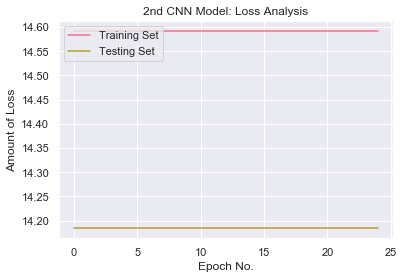

In [584]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('2nd CNN Model: Loss Analysis')
plt.ylabel('Amount of Loss')
plt.xlabel('Epoch No.')
plt.legend(['Training Set', 'Testing Set'], loc='upper left')
plt.show()

In [585]:
# re-instantiating model for cifar110

cnn2model = Sequential()
cnn2model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3),padding='same'))
cnn2model.add(MaxPooling2D((2, 2),padding='same'))
cnn2model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
cnn2model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn2model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
cnn2model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn2model.add(Flatten())
cnn2model.add(Dense(128, activation='relu'))
cnn2model.add(Dense(110, activation='softmax'))

cnn2model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
print(cnn2model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 2048)              0         
__________

In [586]:
time_start= time.time()
history = cnn2model.fit(xtrain110, ytrain110,
                            nb_epoch=10,
                            verbose=1,
                            validation_data=(xtest110, ytest110))
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-110 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 2400 samples, validate on 400 samples
Epoch 1/10
2400/2400 [==============================] - 15s 6ms/step - loss: 16.0010 - acc: 0.0071 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 2/10
2400/2400 [==============================] - 15s 6ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 3/10
2400/2400 [==============================] - 16s 7ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 4/10
2400/2400 [==============================] - 14s 6ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 5/10
2400/2400 [==============================] - 14s 6ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 6/10
2400/2400 [==============================] - 15s 6ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0.0050
Epoch 7/10
2400/2400 [==============================] - 15s 6ms/step - loss: 15.9972 - acc: 0.0075 - val_loss: 16.0375 - val_acc: 0

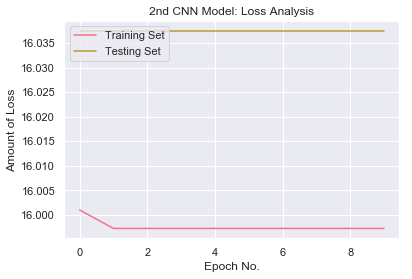

In [587]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('2nd CNN Model: Loss Analysis')
plt.ylabel('Amount of Loss')
plt.xlabel('Epoch No.')
plt.legend(['Training Set', 'Testing Set'], loc='upper left')
plt.show()

---

In [612]:
# 3rd and final neural network model

def build_cnn_complex(num_categories):
    
    # Create model architecture
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu",
                     input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(num_categories, activation="softmax"))
    
    # Compile the model
    model.compile(loss="categorical_crossentropy", optimizer="adam",
                  metrics=["accuracy"])
    print(model.summary())
    return model

In [613]:
# cifar 10 analysis

earlystop = EarlyStopping(patience=10)

time_start= time.time()

history = build_cnn_complex(10).fit(xtrain10, ytrain10,
                       nb_epoch=35,
                       verbose=1,
                       callbacks=[earlystop],                        
                       validation_data=(xtest10, ytest10))
    
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-10 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 4, 4, 64)          0         
__________

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 6000 samples, validate on 400 samples
Epoch 1/35
6000/6000 [==============================] - 27s 5ms/step - loss: 14.5280 - acc: 0.0980 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 2/35
6000/6000 [==============================] - 26s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 3/35
6000/6000 [==============================] - 26s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 4/35
6000/6000 [==============================] - 27s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 5/35
6000/6000 [==============================] - 25s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 6/35
6000/6000 [==============================] - 26s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0.1150
Epoch 7/35
6000/6000 [==============================] - 25s 4ms/step - loss: 14.5412 - acc: 0.0978 - val_loss: 14.2645 - val_acc: 0

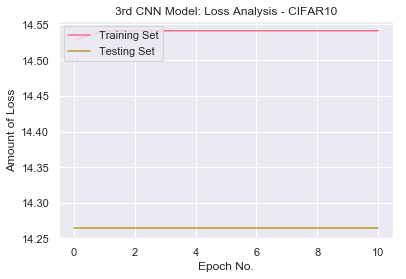

In [614]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3rd CNN Model: Loss Analysis - CIFAR10')
plt.ylabel('Amount of Loss')
plt.xlabel('Epoch No.')
plt.legend(['Training Set', 'Testing Set'], loc='upper left')
plt.show()

In [615]:
# cifar 110 Analysis

earlystop = EarlyStopping(patience=10)

time_start= time.time()

history = build_cnn_complex(110).fit(xtrain110, ytrain110,
                       nb_epoch=35,
                       verbose=1,
                       callbacks=[earlystop],                        
                       validation_data=(xtest110, ytest110))
    
    
cnnscore = np.mean(history.history['val_acc'])
print('Accuracy Score for this CNN for CIFAR-110 dataset is: ', cnnscore)
print('This model took {} seconds'.format(time.time()-time_start))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_109 (Conv2D)          (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 4, 4, 64)          0         
__________

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 2400 samples, validate on 400 samples
Epoch 1/35
2400/2400 [==============================] - 11s 5ms/step - loss: 15.8784 - acc: 0.0146 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 2/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 3/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 4/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 5/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 6/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0.0100
Epoch 7/35
2400/2400 [==============================] - 10s 4ms/step - loss: 15.8629 - acc: 0.0158 - val_loss: 15.9569 - val_acc: 0

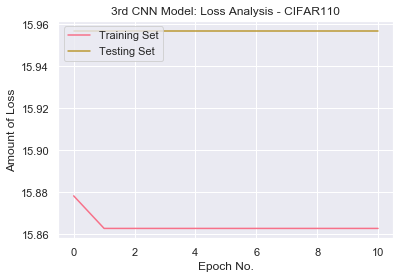

In [616]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('3rd CNN Model: Loss Analysis - CIFAR110')
plt.ylabel('Amount of Loss')
plt.xlabel('Epoch No.')
plt.legend(['Training Set', 'Testing Set'], loc='upper left')
plt.show()

__Analysis:__

Well, Something is defintely awry here. Obviously, if I knew what it was, I would've addressed it. I made sure not to make any severe mistakes like setting the loss function to "binary_entropy" or something like that. Nevertheless, it looks like the black box-iness of ANNs have won the best of me today.

# 7. Conclusion

In [645]:
# setting up graph data

timelist10 = [163.19, 852,84, 287.42]
timelist10avg = np.mean(timelist10)
timelist10std = np.std(timelist10)

acclist10 = [10,12,11.5]
acclist10avg = np.mean(acclist10)
acclist10std = np.std(acclist10)


timelist110 = [66.36, 151, 115.58]
timelist110avg = np.mean(timelist110)
timelist110std = np.std(timelist110)

acclist110 = [1, 0.5, 1]
acclist110avg = np.mean(acclist110)
acclist110std = np.std(acclist110)

modelnames = ['Simple CNN', 'Complex CNN', 'More Complex']            

In [646]:
# setting up dataframe for glorious seaborn
acctimeplotdf = pd.DataFrame()
acctimeplotdf['Processing Time'] = pd.Series(timelist10)
acctimeplotdf['Model Accuracy'] = pd.Series(acclist10)

acctimeplotdf110 = pd.DataFrame()
acctimeplotdf110['Processing Time'] = pd.Series(timelist110)
acctimeplotdf110['Model Accuracy'] = pd.Series(acclist110)


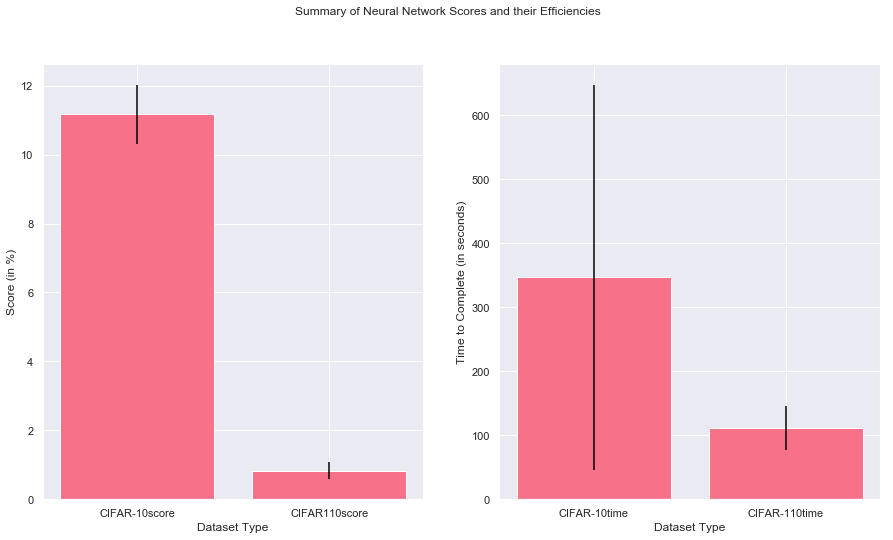

In [648]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)

plt.bar(x=['CIFAR-10score', 'CIFAR110score'],
       height=[acclist10avg, acclist110avg],
       yerr=[acclist10std, acclist110std])

plt.xlabel('Dataset Type')
plt.ylabel('Score (in %)')


plt.subplot(1,2,2)
plt.bar(x=['CIFAR-10time', 'CIFAR-110time'],
       height=[timelist10avg, timelist110avg], yerr=[timelist10std, timelist110std])
plt.xlabel('Dataset Type')
plt.ylabel('Time to Complete (in seconds)')
          
    
plt.suptitle('Summary of Neural Network Scores and their Efficiencies')
plt.show()

__Final Analysis:__

CIFAR-10 and -100 are reputable datasets that deserve a more in-depth analysis, including finding examples of close-but-incorrect classifications as well as implementation of an analysis on the superclass classifications, which was not done here.

__The Problem:__ Which supervised model proves to be the best accuracy/efficiency tradeoff for image classification?

__The Answer:__ Three main convolutional neural networks were identified here, each with their own optimization engine, specific layering, and specific layer activation algorithms. While the raw scores themselves are unfortunate, they do suggest that the highest accuracy is not the best tradeoff. For example, in the CIFAR-10 dataset, the model scored 12% (2% above random) after 852 seconds; however, a different model achieved 11.5% in 287.42 seconds. 

When looking at the time/accuracy tradeoff overall, the __simplest CNN fared the best.__ It is important to note that this conclusion, however, is not supplied with sufficient analysis to officially declare that the null hypothesis can be rejected in terms of identifying which model is the best. More repetitions of this modeling is required for finding significance (or lack thereof)

I hope you enjoyed this project.

John A. Fonte